Install Library

In [6]:
%pip install pandas
%pip install plotly
%pip install matplotlib
%pip install nbformat

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


Import

In [7]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import re
from datetime import datetime, timedelta
import math

Read file

In [8]:
with open('/home/drasogun/DraSoGun/Work/CANSAT_UDUCK/Hardware/Data/log_2.txt', 'r', encoding='utf-8', errors='replace') as f:
    text = f.read()

Clean Data

In [9]:
blocks = text.split('-------------')
print(blocks)
sec = -1
b = -1
data = []
vis = []
listxt = ('S','R','I',' ','.',',','-','0','1','2','3','4','5','6','7','8','9','\n',':')

for block in blocks:
    b += 1
    ch = 1
    for s in block:
        if s not in listxt:
            ch = 0
            break
    vis.append(ch)
for x in vis:
    print(x,end=" ")

['-\n9320900\n-\n-\n-\n9999\n0\n\n29.96\n1004.14\n76.16\n60.86\n\n-0.77,-10.32,0.01\n-13.40,83.34,18.62\n-89.92,4.26\n\nRSSI : -84\n2025-05-28 23:32:09\n', '\n-\n9321000\n-\n-\n-\n9999\n0\n\n30.01\n1004.13\n76.19\n60.82\n\n-0.23,-8.47,-0.09\n33.25,159.89,2.84\n-90.58,1.52\n\nRSSI : -82\n2025-05-28 23:32:11\n', '\n-\n9321300\n-\n-\n-\n374\n3\n\n30.04\n1004.07\n76.68\n60.77\n\n-0.57,-9.65,-0.29\n16.19,-79.52,90.69\n-91.75,3.36\n\nRSSI : -82\n2025-05-28 23:32:12\n', '\n-\n9321300\n-\n-\n-\n374\n3\n\n30.09\n1004.10\n76.47\n60.73\n\n-0.57,-8.87,-0.19\n-62.15,204.69,5.46\n-91.21,3.65\n\nRSSI : -93\n2025-05-28 23:32:14\n', '\n-\n9321500\n-\n-\n-\n374\n3\n\n30.12\n1004.09\n76.53\n60.69\n\n-0.78,-10.16,-0.08\n30.74,40.57,8.71\n-90.46,4.38\n\nRSSI : -86\n2025-05-28 23:32:15\n', '\n-\n9321700\n-\n-\n-\n9999\n0\n\n30.15\n1004.08\n76.61\n60.69\n\n-0.66,-9.39,0.28\n20.37,34.04,5.60\n-88.31,4.01\n\nRSSI : -87\n2025-05-28 23:32:17\n', '\n-\n9321800\n-\n-\n-\n9999\n0\n\n30.18\n1004.08\n76.60\n60.75\n\n

Add Data

In [10]:
blocks = text.split('-------------')
sec = -1
b = -1
data = []
vis = []
listxt = ('S','R','I',' ','.',',','-','0','1','2','3','4','5','6','7','8','9','\n',':')

for block in blocks:
    b += 1
    ch = 1
    for s in block:
        if s not in listxt:
            ch = 0
            break
    vis.append(ch)
for block in blocks:
    sec += 1
    if not vis[sec]:
        data.append({
            'second': sec,
            'Time': float('nan'),
            'Latitude': float('nan'),
            'Longitude': float('nan'),
            'Speed': float('nan'),
            'Course': float('nan'),
            'Altitude_GPS': float('nan'),
            'HDOP': float('nan'),
            'Satellite': float('nan'),
            'Temp': float('nan'),
            'Pressure': float('nan'),
            'Altitude_BME280': float('nan'),
            'Humidity': float('nan'),
            'Acc_x': float('nan'),
            'Acc_y': float('nan'),
            'Acc_z': float('nan'),
            'Gyro_x': float('nan'),
            'Gyro_y': float('nan'),
            'Gyro_z': float('nan'),
            'Roll': float('nan'),
            'Pitch': float('nan'),
            'Tilted_x': float('nan'),
            'Tilted_y': float('nan'),
            'RSSI': float('nan')
        })
        continue
    lines = [l.strip() for l in block.splitlines() if l.strip()]
    if len(lines) < 16:
        continue
    # receive data
    latlon = lines[0]
    raw_time = lines[1]
    sp     = lines[2]
    cu     = lines[3]
    altg   = lines[4]
    hdop   = lines[5]
    sat    = lines[6]
    tmp    = lines[7]
    hPa    = lines[8]
    altb   = lines[9]
    hm     = lines[10]
    acc    = lines[11]
    gyro   = lines[12]
    mag    = lines[13]
    rssi   = lines[14]
    dt     = lines[15]
    #tranform data
    if latlon == '-':
        lat = lon = float('nan')
    else:
        lat, lon = map(float, latlon.split(','))
    def f(x): return float(x) if x != '-' else float('nan')
    def i(x): return int(x)   if x != '-' else None

    sp   = f(sp)
    cu   = f(cu)
    altg = f(altg)
    hdop = i(hdop)
    sat  = i(sat)
    tmp  = f(tmp)
    hPa  = f(hPa)
    altb = f(altb)
    hm   = f(hm)

    ax, ay, az = map(float, acc.split(','))
    gx, gy, gz = map(float, gyro.split(','))
    roll, pitch     = map(float, mag.split(','))
    mx = roll
    my = pitch
    if sec == 0:
        fmx = mx
        fmy = my
        mx = 0
        my = 0
    else:
        mx = abs(mx) - abs(fmx)
        my = abs(my) - abs(fmy)
    rssi = int(rssi.split(':')[1].strip())
    #updata on data var
    data.append({
        'second': sec,
        'Time': dt,
        'Latitude': lat,
        'Longitude': lon,
        'Speed': sp,
        'Course': cu,
        'Altitude_GPS': altg,
        'HDOP': hdop,
        'Satellite': sat,
        'Temp': tmp,
        'Pressure': hPa,
        'Altitude_BME280': altb,
        'Humidity': hm,
        'Acc_x': ax,
        'Acc_y': ay,
        'Acc_z': az,
        'Gyro_x': gx,
        'Gyro_y': gy,
        'Gyro_z': gz,
        'Roll': roll,
        'Pitch': pitch,
        'Tilted_x': mx,
        'Tilted_y': my,
        'RSSI': rssi
    })

Data Fram

In [11]:
pd.set_option('display.max_rows', 15)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [12]:
df = pd.DataFrame(data)
df

,second,Time,Latitude,Longitude,Speed,Course,Altitude_GPS,HDOP,Satellite,Temp,Pressure,Altitude_BME280,Humidity,Acc_x,Acc_y,Acc_z,Gyro_x,Gyro_y,Gyro_z,Roll,Pitch,Tilted_x,Tilted_y,RSSI
0,0,2025-05-28 23:32:09,NaN,NaN,NaN,NaN,NaN,9999.0,0.0,29.96,1004.14,76.16,60.86,-0.77,-10.32,0.01,-13.40,83.34,18.62,-89.92,4.26,0.00,0.00,-84.0
1,1,2025-05-28 23:32:11,NaN,NaN,NaN,NaN,NaN,9999.0,0.0,30.01,1004.13,76.19,60.82,-0.23,-8.47,-0.09,33.25,159.89,2.84,-90.58,1.52,0.66,-2.74,-82.0
2,2,2025-05-28 23:32:12,NaN,NaN,NaN,NaN,NaN,374.0,3.0,30.04,1004.07,76.68,60.77,-0.57,-9.65,-0.29,16.19,-79.52,90.69,-91.75,3.36,1.83,-0.90,-82.0
3,3,2025-05-28 23:32:14,NaN,NaN,NaN,NaN,NaN,374.0,3.0,30.09,1004.10,76.47,60.73,-0.57,-8.87,-0.19,-62.15,204.69,5.46,-91.21,3.65,1.29,-0.61,-93.0
4,4,2025-05-28 23:32:15,NaN,NaN,NaN,NaN,NaN,374.0,3.0,30.12,1004.09,76.53,60.69,-0.78,-10.16,-0.08,30.74,40.57,8.71,-90.46,4.38,0.54,0.12,-86.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,195,2025-05-28 23:37:48,13.985914,100.616975,69.0,7267.0,1810.0,9999.0,0.0,36.33,1004.06,76.82,55.92,1.13,-8.75,0.30,-29.89,55.63,-6.22,-88.04,-7.33,-1.88,3.07,-65.0
196,196,2025-05-28 23:37:50,13.985914,100.616975,69.0,7267.0,1810.0,9999.0,0.0,36.32,1003.86,78.50,55.88,0.47,-9.40,0.16,45.44,37.97,-25.63,-89.05,-2.87,-0.87,-1.39,-63.0
197,197,2025-05-28 23:37:52,13.986064,100.617157,869.0,6215.0,1840.0,377.0,3.0,36.32,1004.08,76.65,55.87,0.98,-7.93,0.92,-6.10,-145.60,18.59,-83.40,-6.98,-6.52,2.72,-51.0
198,198,2025-05-28 23:37:54,13.986116,100.617186,494.0,5446.0,1800.0,377.0,3.0,36.31,1004.09,76.55,55.83,1.57,-9.66,0.61,-12.13,0.56,0.92,-86.40,-9.23,-3.52,4.97,-45.0


Plot graph

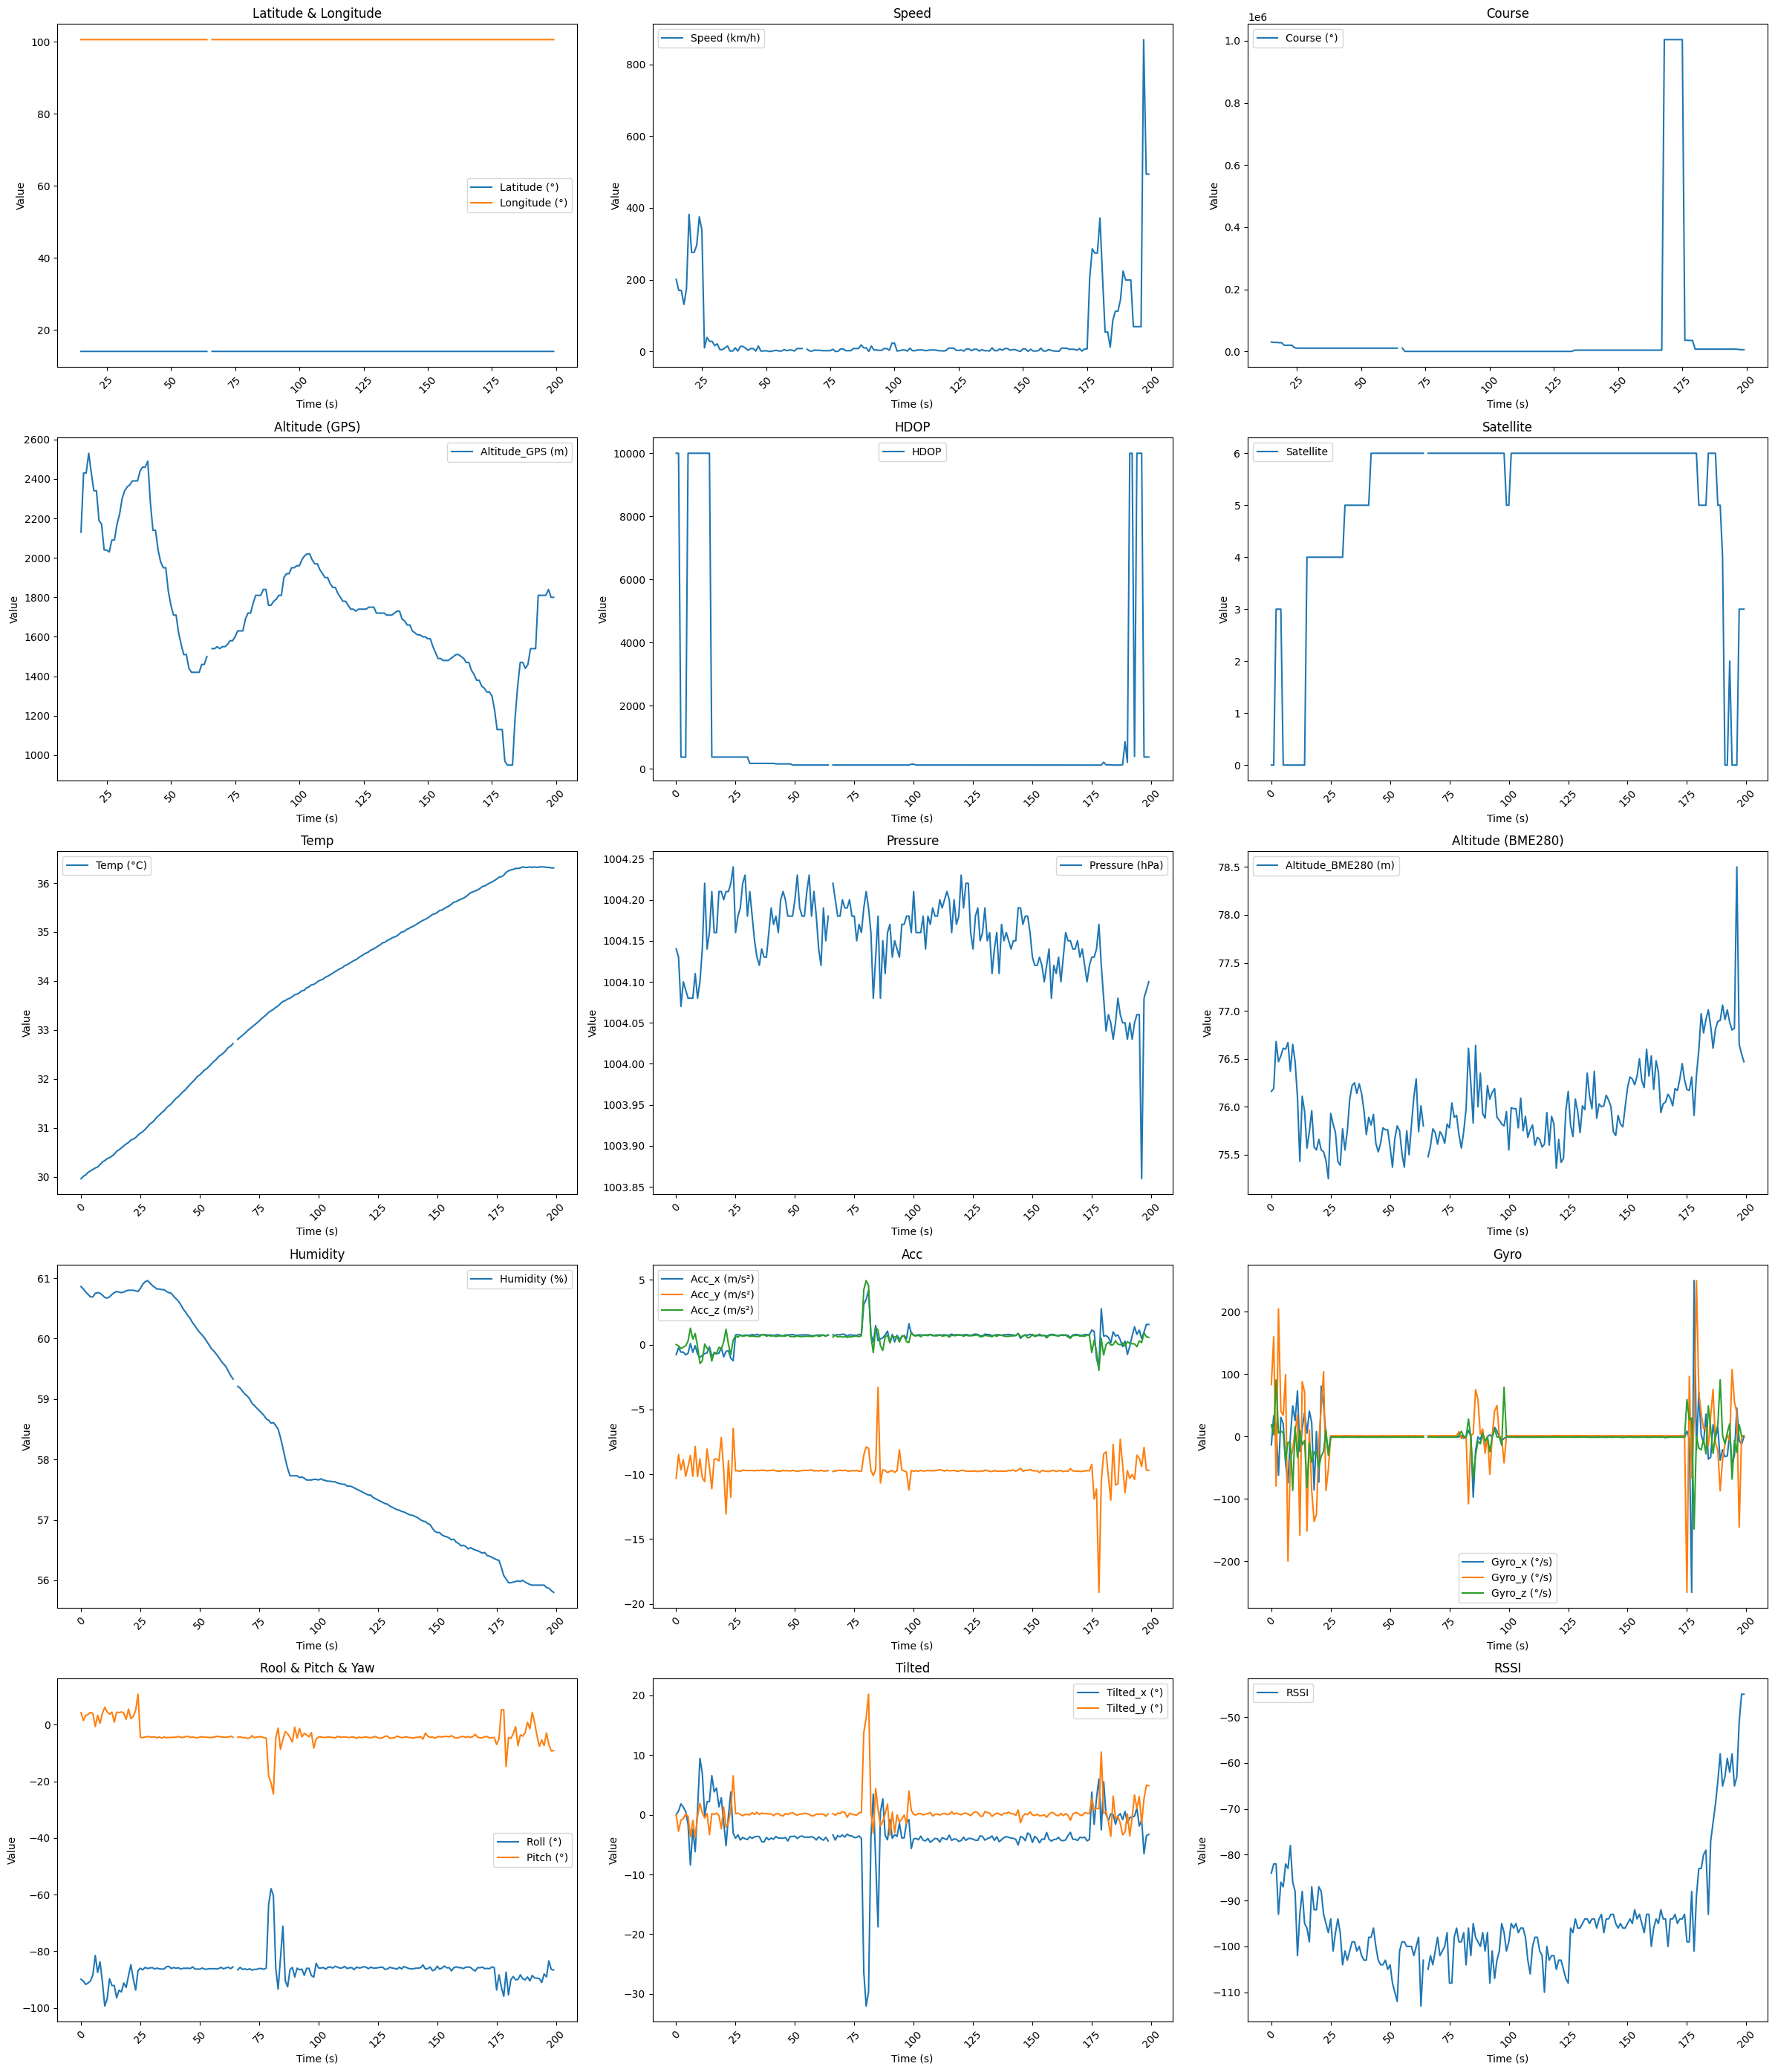

In [13]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(5, 3,figsize=(24, 28))
ax1, ax2, ax3, ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12,ax13,ax14,ax15 = axes.flatten()

# Latitude & Longitude
ax1.plot(df['second'], df['Latitude'], label='Latitude (°)')
ax1.plot(df['second'], df['Longitude'], label='Longitude (°)')
ax1.set_title('Latitude & Longitude')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Value')
ax1.legend()

# Speed
ax2.plot(df['second'], df['Speed'], label='Speed (km/h)')
ax2.set_title('Speed')
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Value')
ax2.legend()

# Course
ax3.plot(df['second'], df['Course'], label='Course (°)')
ax3.set_title('Course')
ax3.set_xlabel('Time (s)')
ax3.set_ylabel('Value')
ax3.legend()

# Altitude_GPS
ax4.plot(df['second'], df['Altitude_GPS'], label='Altitude_GPS (m)')
ax4.set_title('Altitude (GPS)')
ax4.set_xlabel('Time (s)')
ax4.set_ylabel('Value')
ax4.legend()

# HDOP	
ax5.plot(df['second'], df['HDOP'], label='HDOP')
ax5.set_title('HDOP')
ax5.set_xlabel('Time (s)')
ax5.set_ylabel('Value')
ax5.legend()

# Satellite
ax6.plot(df['second'], df['Satellite'], label='Satellite')
ax6.set_title('Satellite')
ax6.set_xlabel('Time (s)')
ax6.set_ylabel('Value')
ax6.legend()

# Temp
ax7.plot(df['second'], df['Temp'], label='Temp (°C)')
ax7.set_title('Temp')
ax7.set_xlabel('Time (s)')
ax7.set_ylabel('Value')
ax7.legend()

# Pressure
ax8.plot(df['second'], df['Pressure'], label='Pressure (hPa)')
ax8.set_title('Pressure')
ax8.set_xlabel('Time (s)')
ax8.set_ylabel('Value')
ax8.legend()

# Altitude_BME280
ax9.plot(df['second'], df['Altitude_BME280'], label='Altitude_BME280 (m)')
ax9.set_title('Altitude (BME280)')
ax9.set_xlabel('Time (s)')
ax9.set_ylabel('Value')
ax9.legend()

# Humidity
ax10.plot(df['second'], df['Humidity'], label='Humidity (%)')
ax10.set_title('Humidity')
ax10.set_xlabel('Time (s)')
ax10.set_ylabel('Value')
ax10.legend()

# Acc
ax11.plot(df['second'], df['Acc_x'], label='Acc_x (m/s²)')
ax11.plot(df['second'], df['Acc_y'], label='Acc_y (m/s²)')
ax11.plot(df['second'], df['Acc_z'], label='Acc_z (m/s²)')
ax11.set_title('Acc')
ax11.set_xlabel('Time (s)')
ax11.set_ylabel('Value')
ax11.legend()

# Gyro
ax12.plot(df['second'], df['Gyro_x'], label='Gyro_x (°/s)')
ax12.plot(df['second'], df['Gyro_y'], label='Gyro_y (°/s)')
ax12.plot(df['second'], df['Gyro_z'], label='Gyro_z (°/s)')
ax12.set_title('Gyro')
ax12.set_xlabel('Time (s)')
ax12.set_ylabel('Value')
ax12.legend()

# Roll Pitch Yaw
ax13.plot(df['second'], df['Roll'], label='Roll (°)')
ax13.plot(df['second'], df['Pitch'], label='Pitch (°)')
ax13.set_title('Rool & Pitch & Yaw')
ax13.set_xlabel('Time (s)')
ax13.set_ylabel('Value')
ax13.legend()

# Tilted
ax14.plot(df['second'], df['Tilted_x'], label='Tilted_x (°)')
ax14.plot(df['second'], df['Tilted_y'], label='Tilted_y (°)')
ax14.set_title('Tilted')
ax14.set_xlabel('Time (s)')
ax14.set_ylabel('Value')
ax14.legend()

# RSSI
ax15.plot(df['second'], df['RSSI'], label='RSSI')
ax15.set_title('RSSI')
ax15.set_xlabel('Time (s)')
ax15.set_ylabel('Value')
ax15.legend()

# หมุน tick labels ทุกกราฟ
for ax in axes.flatten():
    for label in ax.get_xticklabels():
        label.set_rotation(45)

fig.tight_layout()
plt.show()


Map

In [14]:
fig = px.scatter_mapbox(
    df,
    lat="Latitude",
    lon="Longitude",
    hover_name="second",
    zoom=12,
    height=600,
    mapbox_style="open-street-map"
)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()


/tmp/ipykernel_8422/3317165664.py:1: DeprecationWarning: *scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/
  fig = px.scatter_mapbox(
